# **House Price Pridiction :**

# **Importing the Packages :**

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [215]:
import warnings
warnings.filterwarnings('ignore')

# **Uploading Dataset :**

In [216]:
data = pd.read_csv("train-chennai-sale.csv")
data

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


# **Data Cleaning :**

In [217]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [218]:
# Features and Target

* **Features :** PRT_ID, AREA, INT_SQFT, DATE_SALE, DIST_MAINROAD, N_BEDROOM,N_BATHROOM, N_ROOM, SALE_COND, PARK_FACIL, DATE_BUILD, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL, REG_FEE, COMMIS .
* **Target :** SALES_PRICE .

In [219]:
# Rows and Columns

In [220]:
data.shape

(7109, 22)

In [221]:
# Checking the datatypes

In [222]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [223]:
# Cheking Null Values

In [224]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [225]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [226]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

### **ID :**

In [227]:
data.PRT_ID.values[0]

'P03210'

In [228]:
data = data.drop(columns = ['PRT_ID']) # Droping the Id Column

### **Area :**

In [229]:
data.AREA.values[0]

'Karapakkam'

In [230]:
data.AREA = data['AREA'].str.lower() # Bring the text data to lowercase
data.AREA = data['AREA'].str.strip() # Delete unwanted whitespaces

In [231]:
data.AREA.unique()

array(['karapakkam', 'anna nagar', 'adyar', 'velachery', 'chrompet',
       'kk nagar', 'tnagar', 't nagar', 'chrompt', 'chrmpet', 'karapakam',
       'ana nagar', 'chormpet', 'adyr', 'velchery', 'ann nagar',
       'kknagar'], dtype=object)

In [232]:
# Correcting Spelling Mistake

In [233]:
data.AREA = data.AREA.map({'tnagar':'T Nagar','chrompt':'Chrompet','chrmpet':'Chrompet','karapakam':'Karapakkam',
                           'ana nagar':'Anna Nagar','chormpet':'Chrompet','adyr':'Adyar','velchery':'Velachery',
                           'ann nagar':'Anna Nagar','kknagar':'KK Nagar','karapakkam':'Karapakkam', 'anna nagar':'Anna Nagar',
                           'adyar':'Adyar', 'velachery':'Velachery', 'chrompet':'Chrompet','kk nagar':'KK Nagar', 't nagar':'T Nagar'})

In [234]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [235]:
data.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

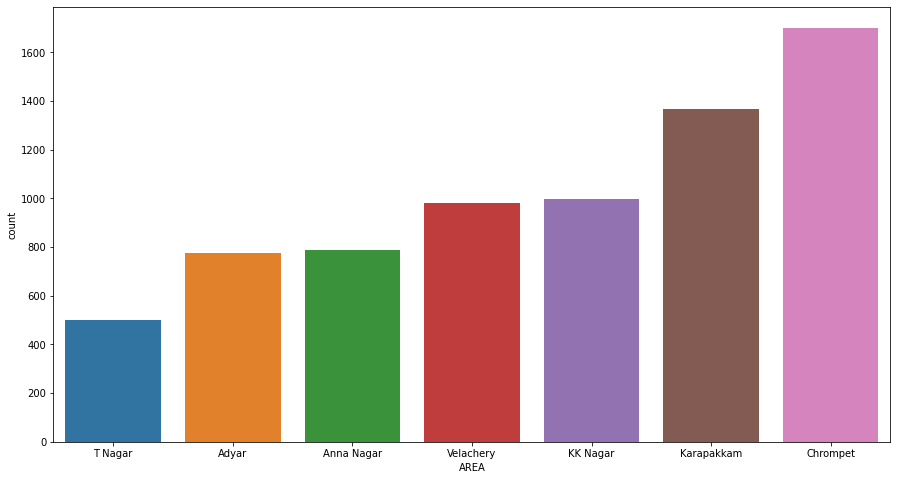

In [236]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x ='AREA',data=data,order = data['AREA'].value_counts(ascending = True).index, ax=ax)
plt.show()

In [237]:
df_sorted = data.groupby('AREA')['SALES_PRICE'].mean().sort_values()

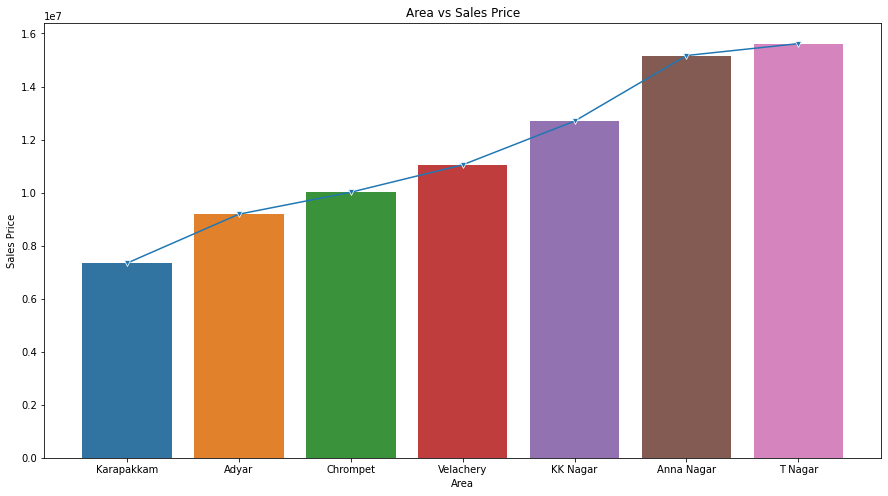

In [238]:
x = df_sorted.index
y = df_sorted.values
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x, y, order = x, ax=ax)
sns.lineplot(x, y, marker = 'v', ax=ax)
plt.xlabel('Area')
plt.ylabel('Sales Price')
plt.title('Area vs Sales Price')
plt.show()

1. There is a linear relationship between Area and Sales Price .

2. The Sales price will change according to the Area .

3. The sales price is high in T Nagar and Anna Nagar when compare to Karapakkam and Adyar . 

4. There is a Linear relationship so we do Label Encoding .

5. Karapakkam < Adyar < Chrompet < Velachery < KK Nagar < Anna Nagar < T Nagar.

In [239]:
# Lable Encoding
data["AREA"] = data["AREA"].map({"Karapakkam" : 1, "Adyar" : 2, "Chrompet" : 3, "Velachery" : 4, "KK Nagar" : 5, "Anna Nagar" : 6, "T Nagar" : 7})

### **Square Feet :**

In [240]:
data.INT_SQFT.values[0]

1004

In [241]:
data.INT_SQFT = data.INT_SQFT.astype('int64') # explicilty type casting

In [242]:
data.INT_SQFT.describe() #summary stats

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [243]:
data.INT_SQFT.value_counts()

1781    18
1538    15
1505    13
1514    13
1634    12
        ..
559      1
2479     1
1330     1
880      1
598      1
Name: INT_SQFT, Length: 1699, dtype: int64

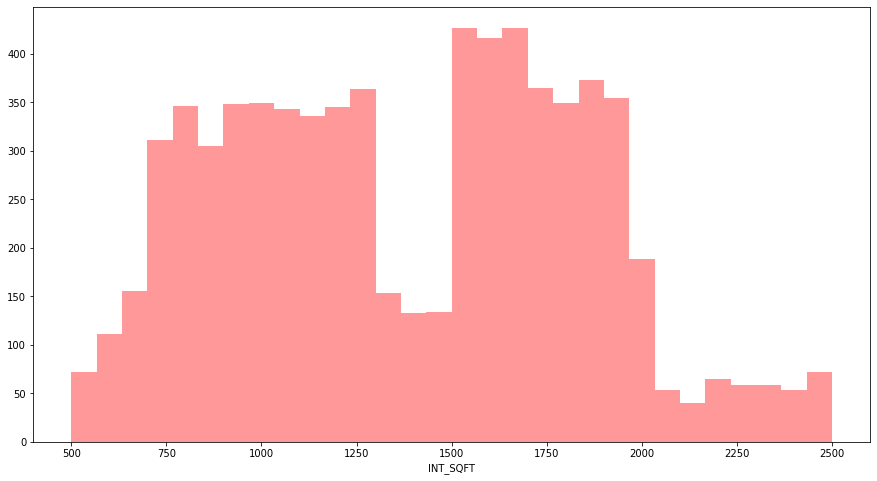

In [244]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(data['INT_SQFT'],kde = False,color ='red', bins = 30,ax=ax)
plt.show()

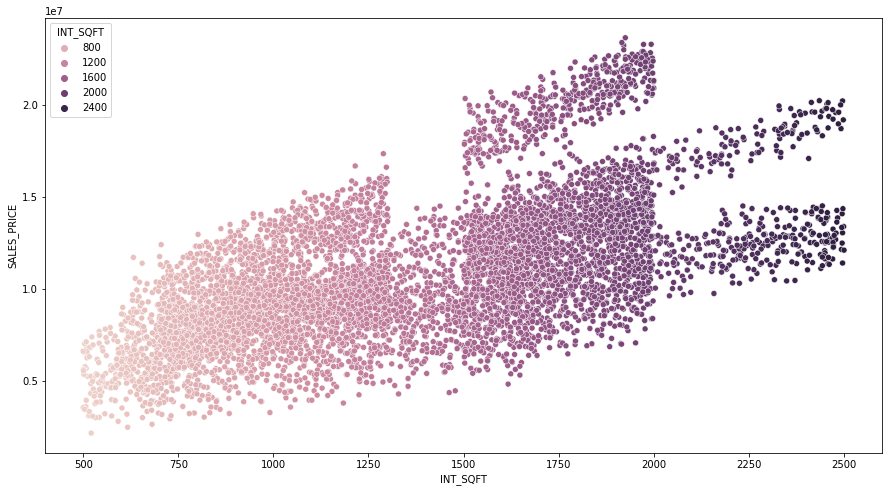

In [245]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x='INT_SQFT', y='SALES_PRICE',data=data, hue = "INT_SQFT",ax=ax)
plt.show()

In [246]:
data[['INT_SQFT','SALES_PRICE']].corr()

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


1. There is a linear relationship between Square Feet and Sales Price .

2. No transformation required .

3. There is a good Correlation .

3. As the Square feet increses the price of the house also increases .

### **Date of Sale :**

In [247]:
data.DATE_SALE.values[0]

'04-05-2011'

In [248]:
data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'])

In [249]:
data.DATE_SALE

0      2011-04-05
1      2006-12-19
2      2012-04-02
3      2010-03-13
4      2009-05-10
          ...    
7104   2011-03-01
7105   2004-08-04
7106   2006-08-25
7107   2009-03-08
7108   2005-07-13
Name: DATE_SALE, Length: 7109, dtype: datetime64[ns]

In [250]:
data['DATE_SALE_YEAR'] = pd.DatetimeIndex(data['DATE_SALE']).year

In [251]:
data['DATE_SALE_YEAR']

0       2011
1       2006
2       2012
3       2010
4       2009
        ... 
7104    2011
7105    2004
7106    2006
7107    2009
7108    2005
Name: DATE_SALE_YEAR, Length: 7109, dtype: int64

### **Date of Build :**

In [252]:
data.DATE_BUILD.values[0]

'15-05-1967'

In [253]:
data['DATE_BUILD'] = pd.to_datetime(data['DATE_BUILD'])

In [254]:
data.DATE_BUILD

0      1967-05-15
1      1995-12-22
2      1992-09-02
3      1988-03-18
4      1979-10-13
          ...    
7104   1962-01-15
7105   1995-11-04
7106   1978-01-09
7107   1977-11-08
7108   1961-07-24
Name: DATE_BUILD, Length: 7109, dtype: datetime64[ns]

In [255]:
data['DATE_BUILD_YEAR'] = pd.DatetimeIndex(data['DATE_BUILD']).year

In [256]:
data['DATE_BUILD_YEAR']

0       1967
1       1995
2       1992
3       1988
4       1979
        ... 
7104    1962
7105    1995
7106    1978
7107    1977
7108    1961
Name: DATE_BUILD_YEAR, Length: 7109, dtype: int64

### **Age of House :**

In [257]:
data['AGE_OF_HOUSE'] = data['DATE_SALE_YEAR'] - data['DATE_BUILD_YEAR']

In [258]:
data['AGE_OF_HOUSE']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: AGE_OF_HOUSE, Length: 7109, dtype: int64

In [259]:
data = data.drop(columns = ['DATE_SALE_YEAR'])

In [260]:
data = data.drop(columns = ['DATE_BUILD_YEAR'])

In [261]:
data = data.drop(columns = ['DATE_SALE'])

In [262]:
data = data.drop(columns = ['DATE_BUILD'])

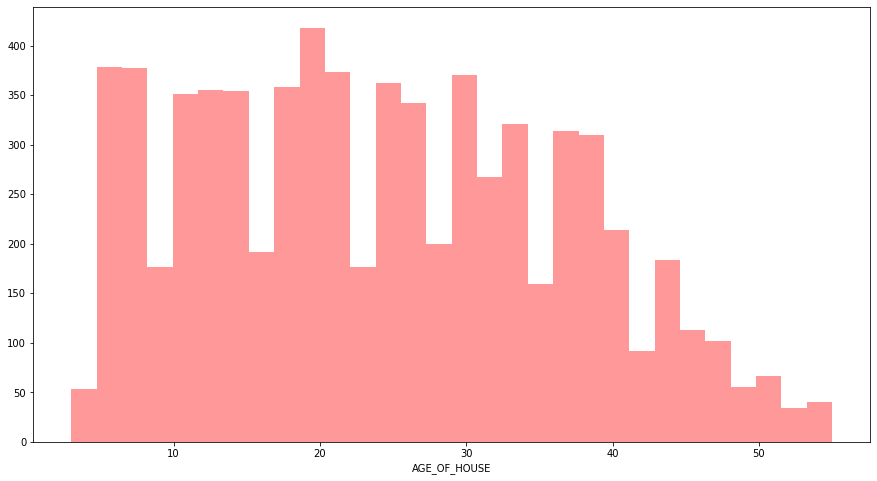

In [263]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(data['AGE_OF_HOUSE'],kde = False,color ='red', bins = 30,ax=ax)
plt.show()

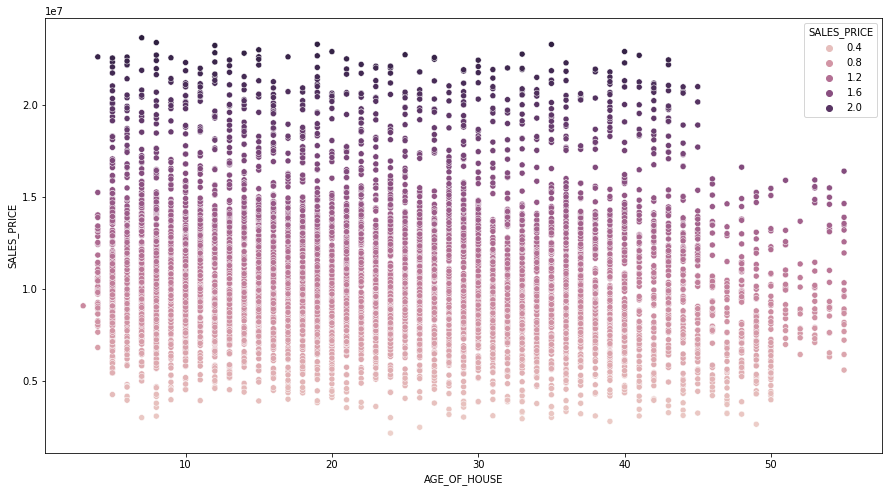

In [264]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x='AGE_OF_HOUSE', y='SALES_PRICE',data=data, hue = "SALES_PRICE",ax=ax)
plt.show()

In [265]:
data[['AGE_OF_HOUSE','SALES_PRICE']].corr()

,AGE_OF_HOUSE,SALES_PRICE
AGE_OF_HOUSE,1.000000,-0.118842
SALES_PRICE,-0.118842,1.000000


1. There is a relationship between Age of the House and Sales Price .

2. There is no linear Relationship because the correlation is very low .

2. Transformation required .


In [266]:
# Transformation
data['TRANSFORMED_AGE_OF_HOUSE'] = np.square(data['AGE_OF_HOUSE'])
# Correlation
data[['TRANSFORMED_AGE_OF_HOUSE','SALES_PRICE']].corr()

,TRANSFORMED_AGE_OF_HOUSE,SALES_PRICE
TRANSFORMED_AGE_OF_HOUSE,1.000000,-0.124443
SALES_PRICE,-0.124443,1.000000


1. Even after Transformation there is no Linear Relationship between Age of the house and Sales Price .

In [267]:
data = data.drop(columns = ['TRANSFORMED_AGE_OF_HOUSE'])

### **Distance To Mainroad :**

In [268]:
data.DIST_MAINROAD.values[0]

131

In [269]:
data.DIST_MAINROAD = data.DIST_MAINROAD.astype('int64') 

In [270]:
data.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [271]:
sum(data.DIST_MAINROAD == 0)

33

In [272]:
data["DIST_MAINROAD"] = data["DIST_MAINROAD"].replace(0, data["DIST_MAINROAD"].mean())

In [273]:
data.DIST_MAINROAD.describe()

count    7109.000000
mean      100.065537
std        56.998635
min         1.000000
25%        51.000000
50%        99.603179
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

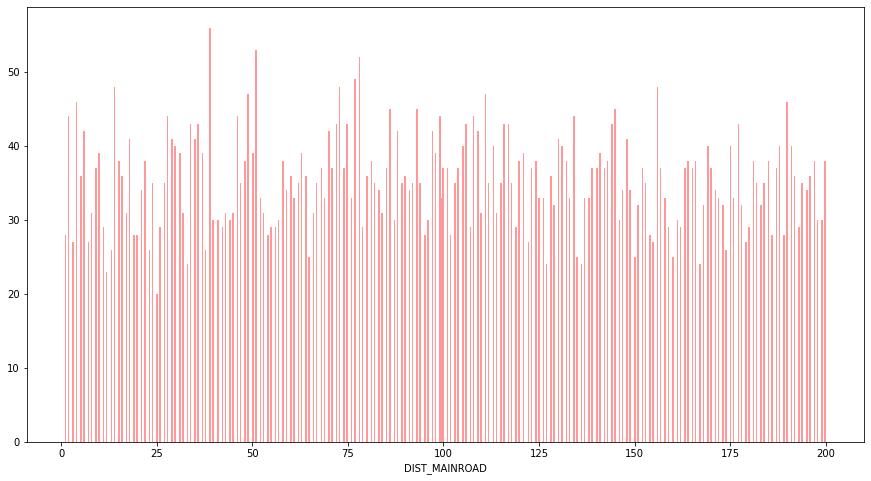

In [274]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(data['DIST_MAINROAD'],kde = False,color ='red', bins = 500,ax=ax)
plt.show()

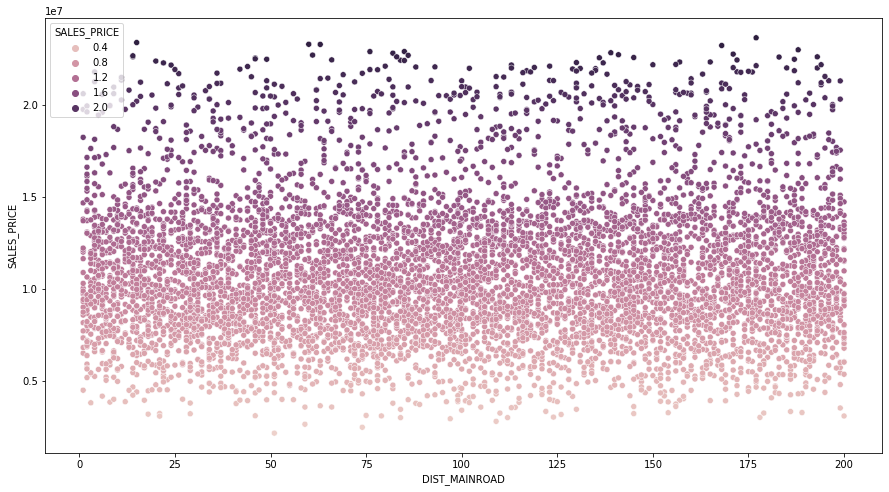

In [275]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x='DIST_MAINROAD', y='SALES_PRICE',data=data, hue = "SALES_PRICE",ax=ax)
plt.show()

In [276]:
data[['DIST_MAINROAD','SALES_PRICE']].corr()

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018778
SALES_PRICE,0.018778,1.000000


1. There is no relationship between Distance to mainroad and Sales Price .

2. We couldn't observe any pattern between them.

3. So, we can delete the feature.



In [277]:
data = data.drop(columns = ['DIST_MAINROAD'])

### **No of Bedroom :**

In [278]:
data.N_BEDROOM.values[0]

1.0

In [279]:
data.N_BEDROOM = data.N_BEDROOM.astype('float') 

In [280]:
data.N_BEDROOM.isnull().sum()

1

In [281]:
data.N_BEDROOM.fillna(1.0,inplace=True)

In [282]:
data.N_BEDROOM.isnull().sum()

0

In [283]:
data.N_BEDROOM.describe()

count    7109.000000
mean        1.636939
std         0.802881
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [284]:
data.N_BEDROOM.value_counts()

1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

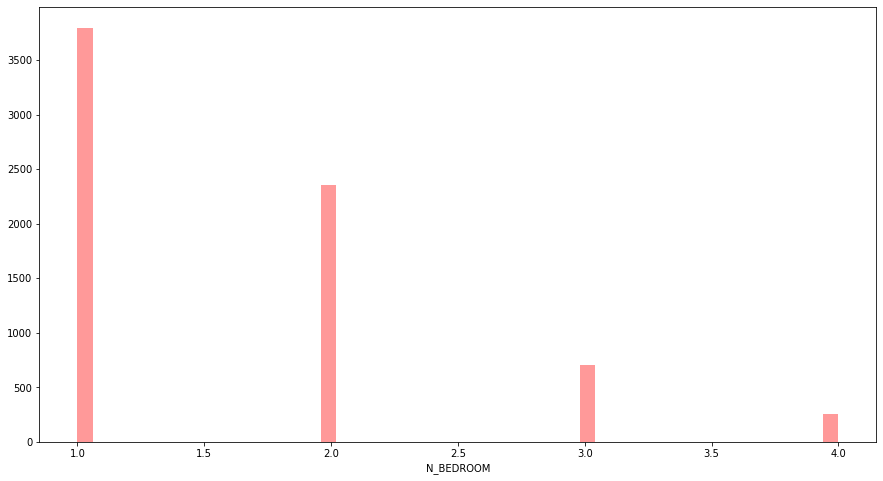

In [285]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(data['N_BEDROOM'],kde = False,color ='red', bins = 50,ax=ax)
plt.show()

In [286]:
df_sorted = data.groupby('N_BEDROOM')['SALES_PRICE'].mean().sort_values()

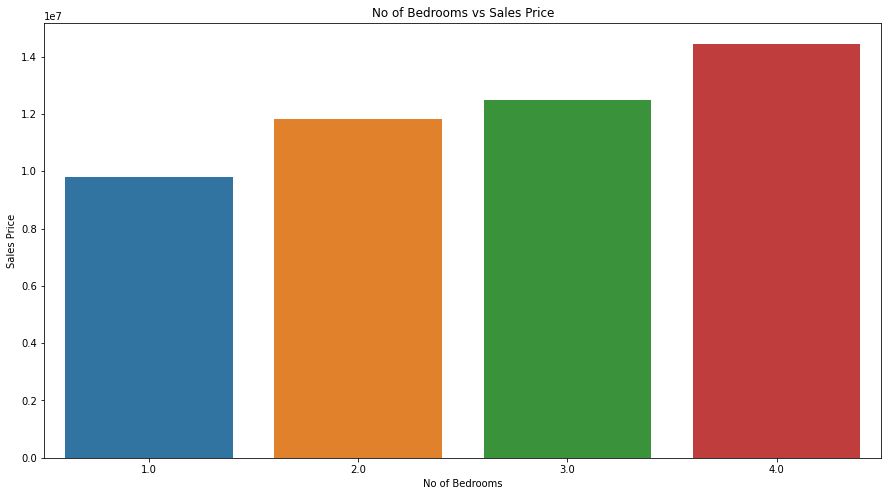

In [287]:
x = df_sorted.index
y = df_sorted.values
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x, y, order = x, ax=ax)
plt.xlabel('No of Bedrooms')
plt.ylabel('Sales Price')
plt.title('No of Bedrooms vs Sales Price')
plt.show()

In [288]:
data[['N_BEDROOM','SALES_PRICE']].corr()

,N_BEDROOM,SALES_PRICE
N_BEDROOM,1.000000,0.330987
SALES_PRICE,0.330987,1.000000


1. There is a relationship between No of Bedrooms and Sales Price .

2. There is a linear relationship. 

3. As the Bedrooms increase the sales price gets incresed.

4. There is good correlation .

5. No Transformation required .

### **No of Bathroom :**

In [289]:
data.N_BATHROOM.values[0]

1.0

In [290]:
data.N_BATHROOM = data.N_BATHROOM.astype('float') 

In [291]:
data.N_BATHROOM.isnull().sum()

5

In [292]:
data.N_BATHROOM.fillna(1.0,inplace=True)

In [293]:
data.N_BATHROOM.isnull().sum()

0

In [294]:
data.N_BATHROOM.describe()

count    7109.000000
mean        1.213110
std         0.409534
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

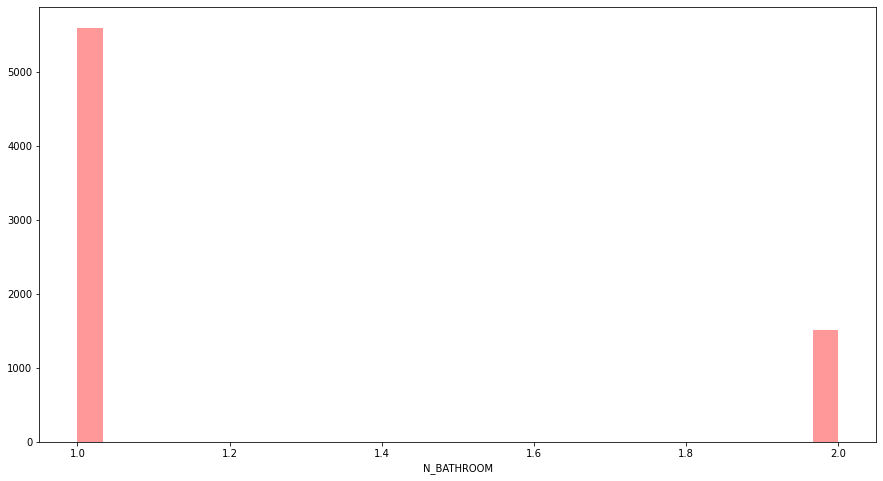

In [295]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(data['N_BATHROOM'],kde = False,color ='red', bins = 30,ax=ax)
plt.show()

In [296]:
df_sorted = data.groupby('N_BATHROOM')['SALES_PRICE'].mean().sort_values()

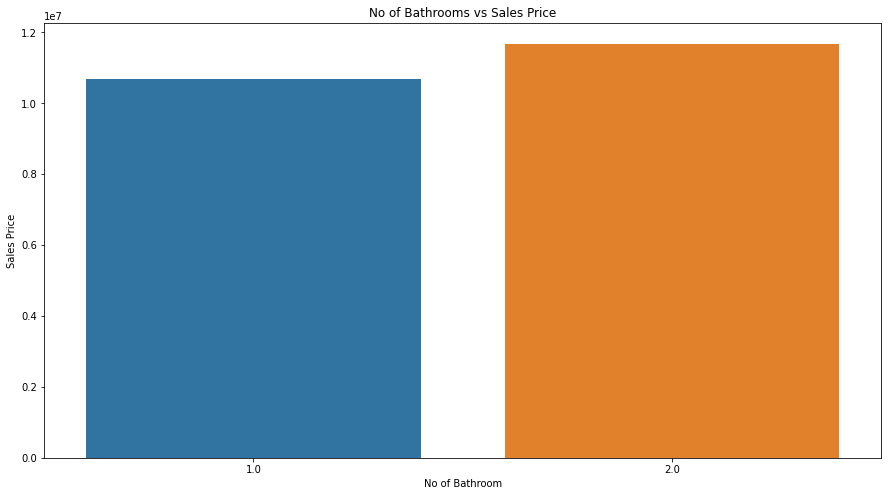

In [297]:
# Feature vs Target
x = df_sorted.index
y = df_sorted.values
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x, y, order = x, ax=ax)
plt.xlabel('No of Bathroom')
plt.ylabel('Sales Price')
plt.title('No of Bathrooms vs Sales Price')
plt.show()

In [298]:
data[['N_BATHROOM','SALES_PRICE']].corr()

,N_BATHROOM,SALES_PRICE
N_BATHROOM,1.000000,0.108834
SALES_PRICE,0.108834,1.000000


1. There is a relationship between No of Bathrooms and Sales Price.

2. There is no linear relationship between No of Bathroom and Sales Price .

3. There is a bad correlation .

4. Transformation required .

In [299]:
# Transformation
data['TRANSFORMED_N_BATHROOM'] = np.square(data['N_BATHROOM'])
# Correlation
data[['TRANSFORMED_N_BATHROOM','SALES_PRICE']].corr()

,TRANSFORMED_N_BATHROOM,SALES_PRICE
TRANSFORMED_N_BATHROOM,1.000000,0.108834
SALES_PRICE,0.108834,1.000000


1. Even after Transformation there is no Linear Relationship between No of Bathrooms and Sales Price .

In [300]:
data = data.drop(columns = ['TRANSFORMED_N_BATHROOM'])

### **No of Rooms :**

In [301]:
data.N_ROOM.values[0]

3

In [302]:
data.N_ROOM = data.N_ROOM.astype('int64') 

In [303]:
data.N_ROOM.describe()

count    7109.000000
mean        3.688704
std         1.019099
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

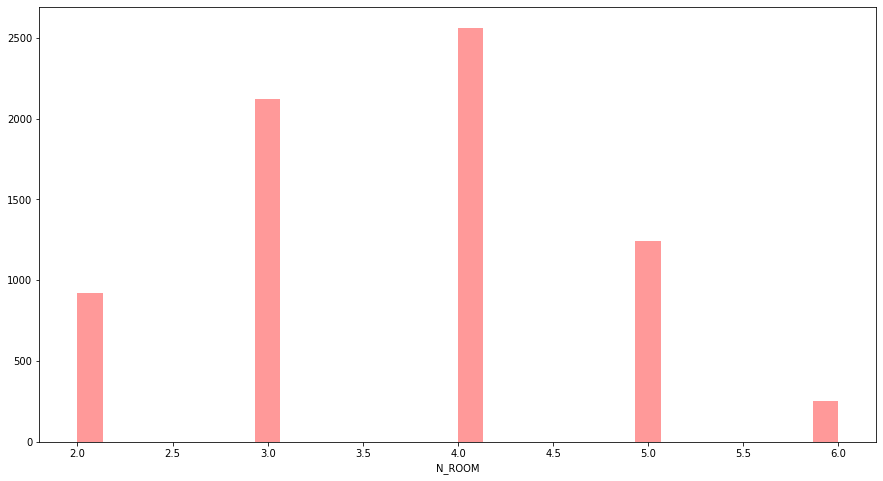

In [304]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(data['N_ROOM'],kde = False,color ='red', bins = 30,ax=ax)
plt.show()

In [305]:
df_sorted = data.groupby('N_ROOM')['SALES_PRICE'].mean().sort_values()

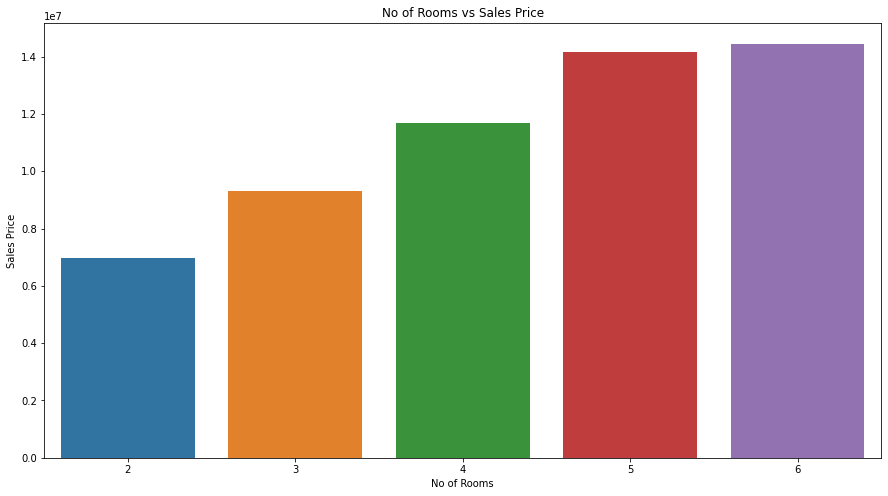

In [306]:
# Feature vs Target
x = df_sorted.index
y = df_sorted.values
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x, y, order = x, ax=ax)
plt.xlabel('No of Rooms')
plt.ylabel('Sales Price')
plt.title('No of Rooms vs Sales Price')
plt.show()

In [307]:
data[['N_ROOM','SALES_PRICE']].corr()

,N_ROOM,SALES_PRICE
N_ROOM,1.00000,0.60276
SALES_PRICE,0.60276,1.00000


1. There is a relationship between Number of Rooms and Sales Price.

2. There is a linear relationship between No of Rooms and Sales Price .

3. As the No of Rooms increases the sales price gets increases .

4. There is a good correlation . 

5. No Transformation required .



### **Sales Condition :**

In [308]:
data.SALE_COND.values[0]

'AbNormal'

In [309]:
data.SALE_COND = data['SALE_COND'].str.lower()
data.SALE_COND = data['SALE_COND'].str.strip()

In [310]:
data.SALE_COND.unique()

array(['abnormal', 'family', 'partial', 'adjland', 'normal sale',
       'ab normal', 'partiall', 'adj land'], dtype=object)

In [311]:
data.SALE_COND = data.SALE_COND.map({'abnormal':'Abnormal', 'family':'Family', 'partial':'Partial', 'adjland':'Adjusted Land', 'normal sale':'Normal Sale',
       'ab normal':'Abnormal', 'partiall':'Partial', 'adj land':'Adjusted Land'})

In [312]:
data.SALE_COND.value_counts()

Adjusted Land    1439
Partial          1433
Normal Sale      1423
Abnormal         1411
Family           1403
Name: SALE_COND, dtype: int64

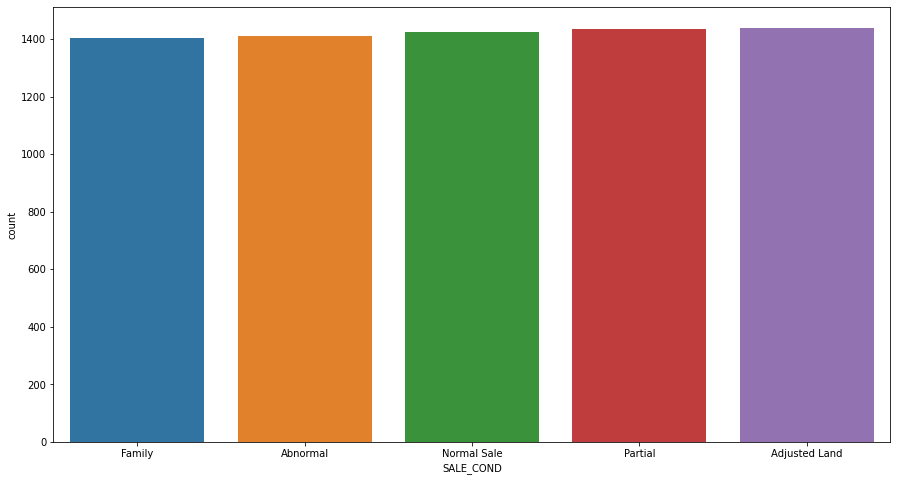

In [313]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x ='SALE_COND', data = data,order = data['SALE_COND'].value_counts(ascending = True).index, ax=ax)
plt.show()

In [314]:
df_sorted = data.groupby('SALE_COND')['SALES_PRICE'].mean().sort_values()

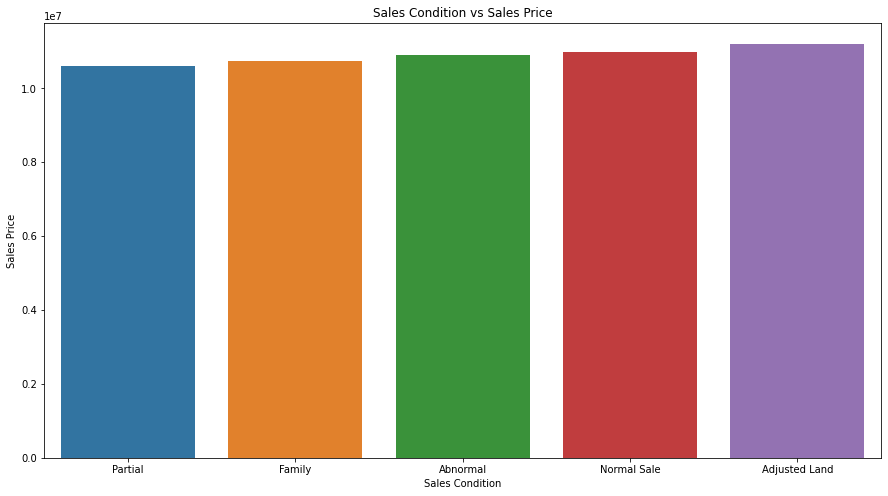

In [315]:
# Feature vs Target
x = df_sorted.index
y = df_sorted.values
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x, y, order = x, ax=ax)
plt.xlabel('Sales Condition')
plt.ylabel('Sales Price')
plt.title('Sales Condition vs Sales Price')
plt.show()

In [316]:
# Lable Encoding
data["SALE_COND"] = data["SALE_COND"].map({"Partial" : 1,"Family" : 2, "Abnormal" : 3, "Normal Sale" : 4, "Adjusted Land" : 5})

1. There is a relationship between sales condition and Sales Price .

2. There is an exact linear trend in the pattern.

3. The Sales price will change according to the sales condition but at very less variation in price.

4. When compared to Family property the Adjusted land sold more . 

5. Partial < Family < AbNormal < Normal < Adjacent.

6. So, we can go with Label Encoding.


### **Parking Facilities Column:**


In [317]:
data.PARK_FACIL.values[0]

'Yes'

In [318]:
data.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [319]:
data.PARK_FACIL = data['PARK_FACIL'].str.lower()
data.PARK_FACIL = data['PARK_FACIL'].str.strip()

In [320]:
data.PARK_FACIL = data.PARK_FACIL.map({'noo':'No','yes':'Yes','no':'No'})

In [321]:
data.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

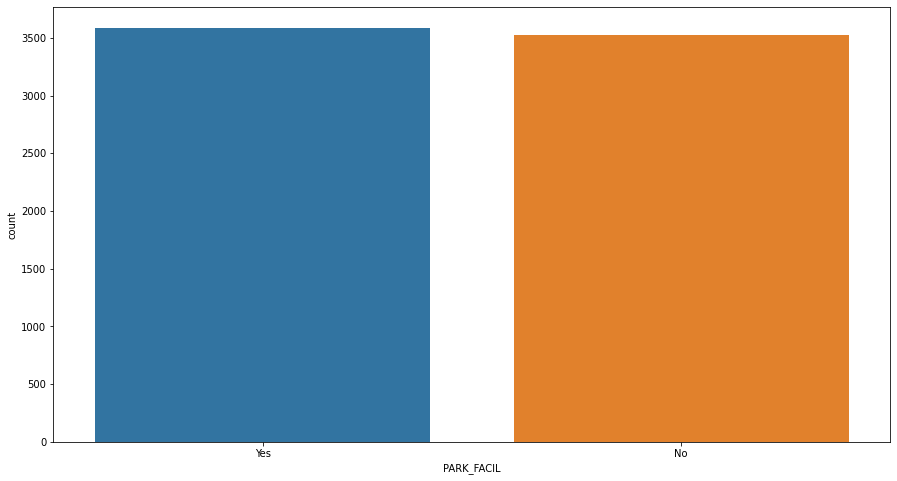

In [322]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x ='PARK_FACIL', data = data, ax = ax)
plt.show()

In [323]:
df_sorted = data.groupby('PARK_FACIL')['SALES_PRICE'].mean().sort_values()

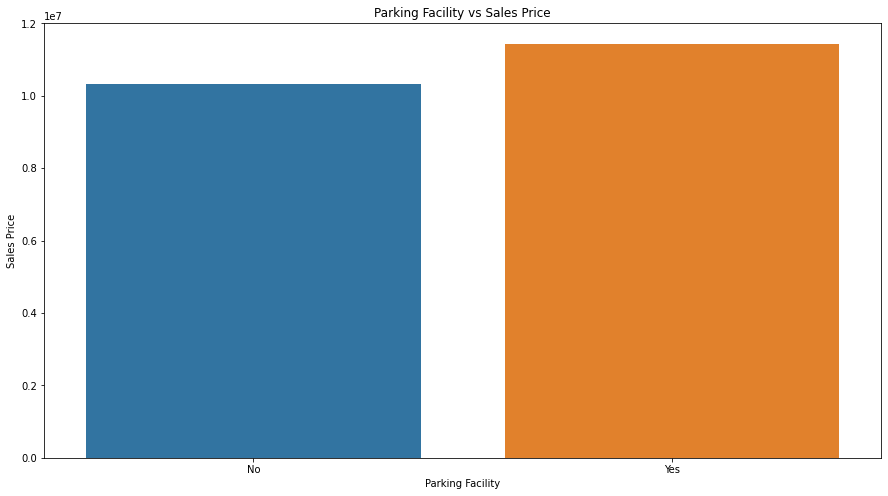

In [324]:
# Feature vs Target
x = df_sorted.index
y = df_sorted.values
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x, y, order = x, ax=ax)
plt.xlabel('Parking Facility')
plt.ylabel('Sales Price')
plt.title('Parking Facility vs Sales Price')
plt.show()

In [325]:
# Lable Encoding
data["PARK_FACIL"] = data["PARK_FACIL"].map({"No" : 1,"Yes" : 2})

1. There is a relationship between parking facility and Sales Price .

2. If there is a parking facility the price of the house will be higher comparing to house without parking but not much difference in price .

3. we can go for Label Encoding .


### **Building Type :**

In [326]:
data.BUILDTYPE.values[0]

'Commercial'

In [327]:
data.BUILDTYPE = data['BUILDTYPE'].str.lower() 
data.BUILDTYPE = data['BUILDTYPE'].str.strip()

In [328]:
data.BUILDTYPE.unique()

array(['commercial', 'others', 'other', 'house', 'comercial'],
      dtype=object)

In [329]:
data.BUILDTYPE = data.BUILDTYPE.map({'commercial':'Commercial','others':'Others','other':'Others','house':'House',
                                     'comercial':'Commercial'})

In [330]:
data.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

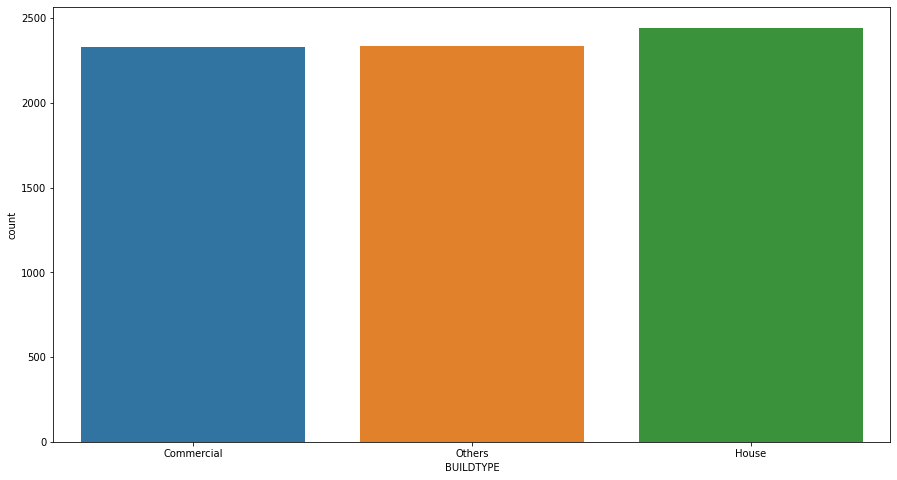

In [331]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x ='BUILDTYPE', data = data, ax = ax)
plt.show()

In [332]:
df_sorted = data.groupby('BUILDTYPE')['SALES_PRICE'].mean().sort_values()

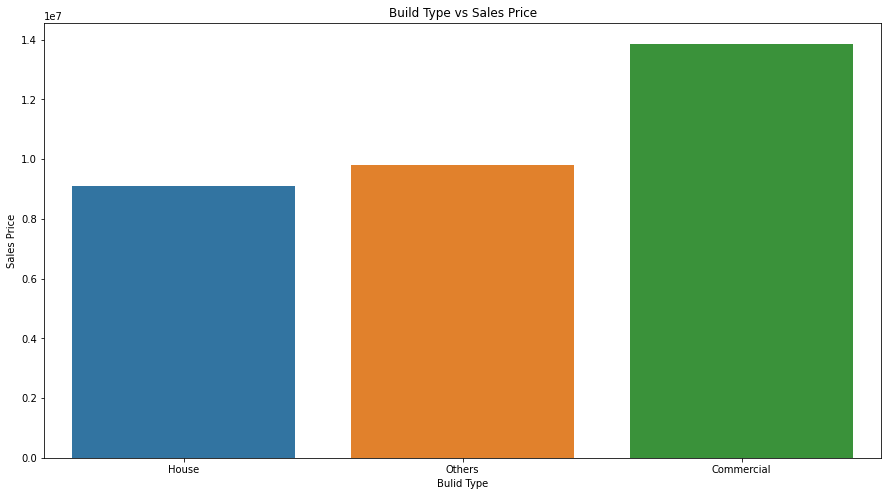

In [333]:
# Feature vs Target
x = df_sorted.index
y = df_sorted.values
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x, y, order = x, ax=ax)
plt.xlabel('Bulid Type')
plt.ylabel('Sales Price')
plt.title('Build Type vs Sales Price')
plt.show()

1. There is a relationship between Build type and Sales price.

1. There is no linear Trend  between Build Type and Sales Price because there is huge spike for the commercial buildings..

2. No Transformation required .

3. If the building is of commercial then the price of the building is high and if the building is House it is less than all category .

4. So, we can go for One-Hot Encoding using get_dummies

In [334]:
# One Hot Encoding
data = pd.get_dummies(data, columns = ['BUILDTYPE'])

### **Utility Available :**

In [335]:
data.UTILITY_AVAIL.values[0]

'AllPub'

In [336]:
data.UTILITY_AVAIL = data['UTILITY_AVAIL'].str.lower() 
data.UTILITY_AVAIL = data['UTILITY_AVAIL'].str.strip()

In [337]:
data.UTILITY_AVAIL.unique()

array(['allpub', 'elo', 'nosewr', 'nosewa', 'all pub'], dtype=object)

In [338]:
data.UTILITY_AVAIL = data.UTILITY_AVAIL.map({'allpub':'AllPub','elo':'Elo','nosewr':'Nosewr','nosewa':'Nosewa',
                                             'all pub':'AllPub'})

In [339]:
data.UTILITY_AVAIL.value_counts()

AllPub    1887
Nosewa    1871
Nosewr    1829
Elo       1522
Name: UTILITY_AVAIL, dtype: int64

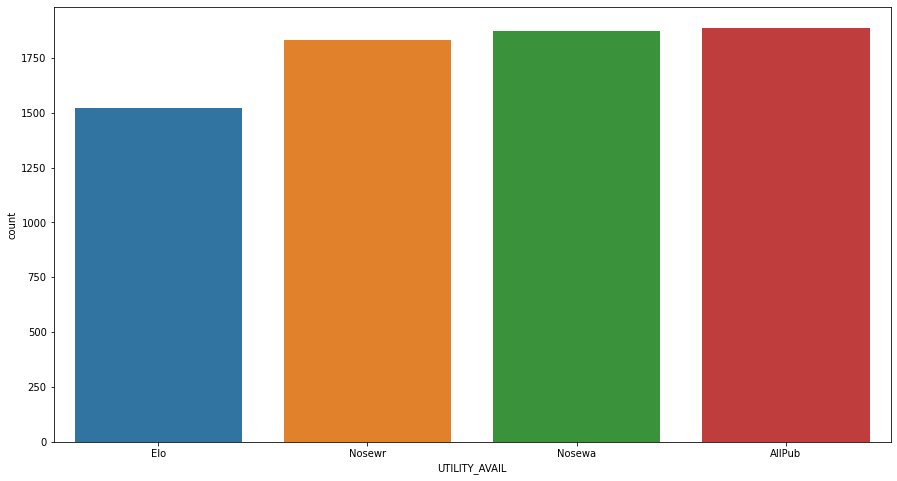

In [340]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x ='UTILITY_AVAIL', data = data,order = data['UTILITY_AVAIL'].value_counts(ascending = True).index, ax = ax)
plt.show()

1. AllPub: All public Utilities (E,G,W,& S) - preferred a lot
2. NoSewr: Electricity, Gas, and Water (No Septic Tank)
3. NoSeWa: Electricity and Gas Only (No Water and Septic Tank)
4. ELO: Electricity only STREET - Least preference

In [341]:
df_sorted = data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().sort_values()

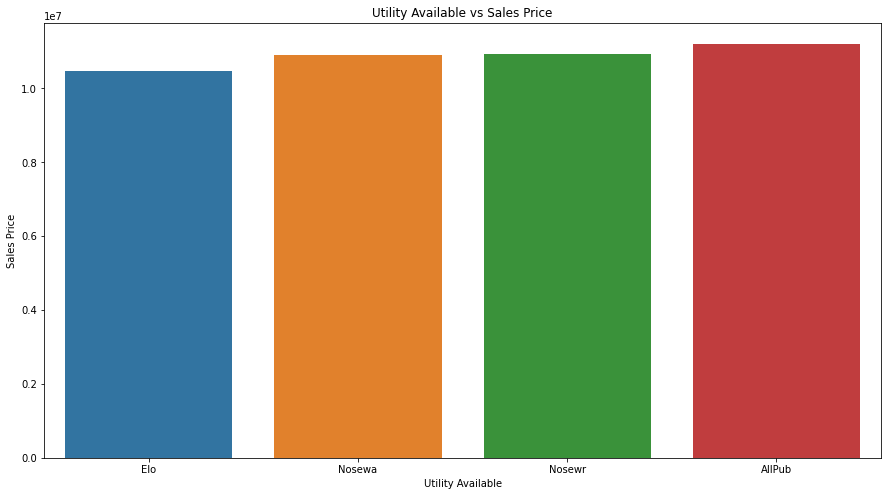

In [342]:
# Feature vs Target
x = df_sorted.index
y = df_sorted.values
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x, y, order = x, ax=ax)
plt.xlabel('Utility Available')
plt.ylabel('Sales Price')
plt.title('Utility Available vs Sales Price')
plt.show()

1. There is a relationship between Utility Available and Sales Price .

2. As the utility available get changes, the sales price too changes.

3. There is a linear trend.

4. So, we can go with Label Encoding.

5. ELO < NoSeWa < NoSewr < AllPub.

In [343]:
# Lable Encoding
data["UTILITY_AVAIL"] = data["UTILITY_AVAIL"].map({"Elo" : 1,"Nosewa" : 2, "Nosewr" : 3, "AllPub" : 4})

### **Street Road Type:**

In [344]:
data.STREET.values[0]

'Paved'

In [345]:
data.STREET = data['STREET'].str.lower() 
data.STREET = data['STREET'].str.strip()

In [346]:
data.STREET.unique()

array(['paved', 'gravel', 'no access', 'pavd', 'noaccess'], dtype=object)

In [347]:
data.STREET = data.STREET.map({'paved':'Paved','gravel':'Gravel','no access':'No Access','pavd':'Paved',
                               'noaccess':'No Access'})

In [348]:
data.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

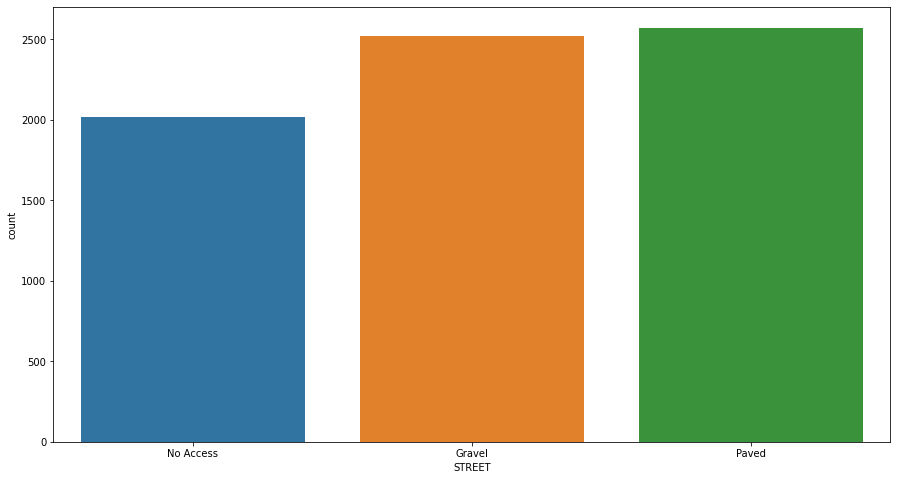

In [349]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x ='STREET', data = data,order = data['STREET'].value_counts(ascending = True).index, ax = ax)
plt.show()

In [350]:
df_sorted = data.groupby('STREET')['SALES_PRICE'].mean().sort_values()

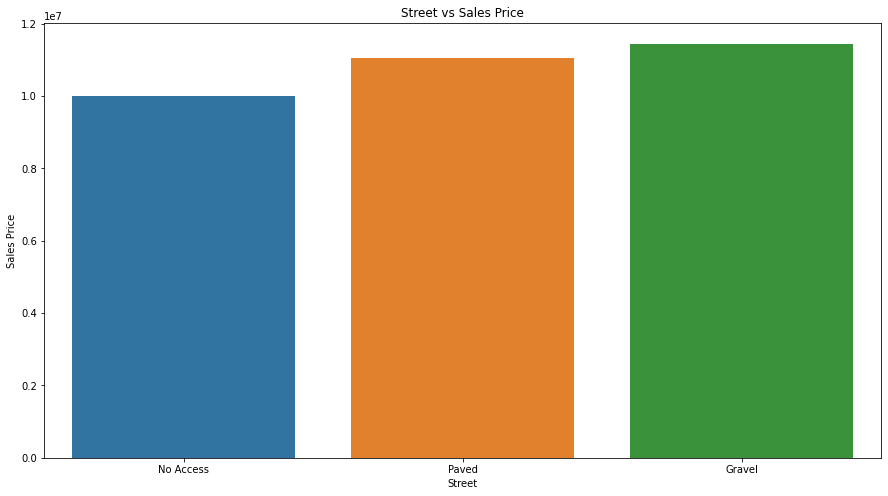

In [351]:
# Feature vs Target
x = df_sorted.index
y = df_sorted.values
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x, y, order = x, ax=ax)
plt.xlabel('Street')
plt.ylabel('Sales Price')
plt.title('Street vs Sales Price')
plt.show()

1. There is a relationship between Street and Sales Price .

2. As the street changes, the sales price too changes.

3. There is an exact linear trend pattern .

4. So, we can go with Label Encoding.

5. NoAccess < Paved < Gravel.

In [352]:
# Lable Encoding
data["STREET"] = data["STREET"].map({"No Access" : 1,"Paved" : 2, "Gravel" : 3})

### **MZ Zone :**

In [353]:
data.MZZONE.values[0]

'A'

In [354]:
data.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [355]:
data.MZZONE = data.MZZONE.map({'A':'Agriculture','RH':'Recidence_High_Density','RL':'Recidence_Low_Density','I':'Industrial',
                               'C':'Commercial','RM':'Recidence_Medium_Density'})

In [356]:
data.MZZONE.value_counts()

Recidence_Low_Density       1858
Recidence_High_Density      1822
Recidence_Medium_Density    1817
Commercial                   550
Agriculture                  537
Industrial                   525
Name: MZZONE, dtype: int64

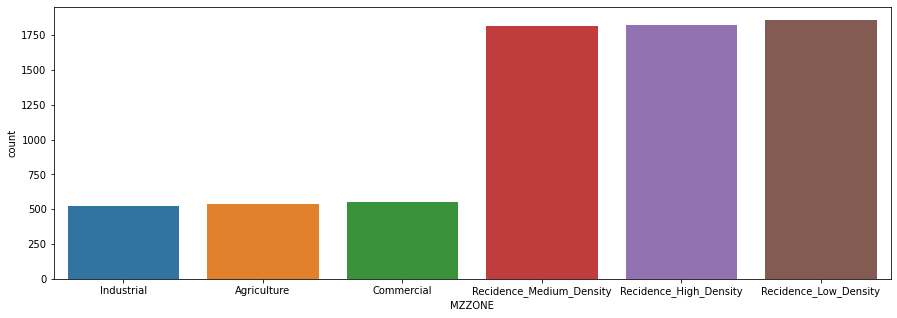

In [357]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x ='MZZONE', data = data,order = data['MZZONE'].value_counts(ascending = True).index, ax = ax)
plt.show()

In [358]:
df_sorted = data.groupby('MZZONE')['SALES_PRICE'].mean().sort_values()

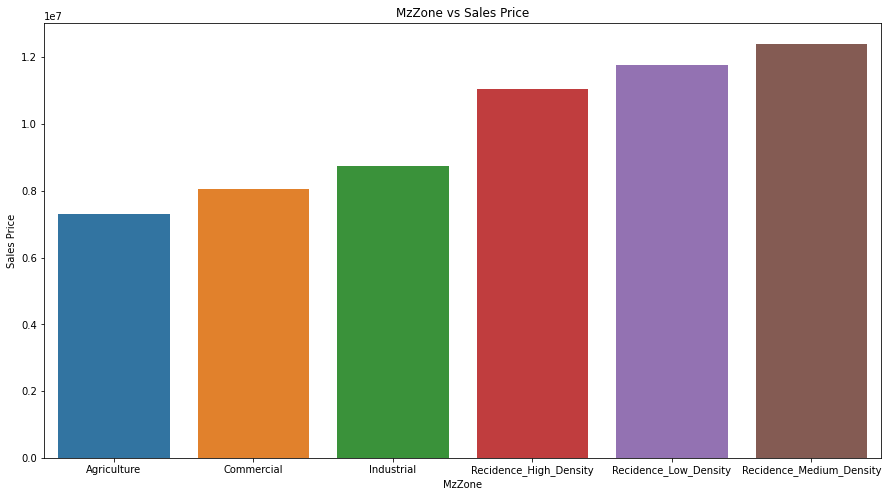

In [359]:
# Feature vs Target
x = df_sorted.index
y = df_sorted.values
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x, y, order = x, ax=ax)
plt.xlabel('MzZone')
plt.ylabel('Sales Price')
plt.title('MzZone vs Sales Price')
plt.show()

1. There is a relationship between Mzzone and sales price.

2. As the sale condition changes, the sales price too changes.

3. The price of the Recidencial medium density has higher sales price and Agriculture land have lower sales price .

4. There is exact linear trend pattern between Residential zones and Agricultural, Commercial, Industrial zones separately.

5. We can go with Label Encoding .
 

6. Agricultural < Commercial < Industrial < Residential High (RH) Density < Residential Low (RL) Density < Residential Medium (RM) Density .


In [360]:
# Lable Encoding
data["MZZONE"] = data["MZZONE"].map({"Agriculture" : 1,"Commercial" : 2, "Industrial" : 3,"Recidence_High_Density" : 4,"Recidence_Low_Density" : 5, "Recidence_Medium_Density" : 6})

### **QS_ROOMS :**         

In [361]:
data.QS_ROOMS.values[0]

4.0

In [362]:
data.QS_ROOMS = data.QS_ROOMS.astype('float') 

In [363]:
data.QS_ROOMS.describe()

count    7109.000000
mean        3.517471
std         0.891972
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

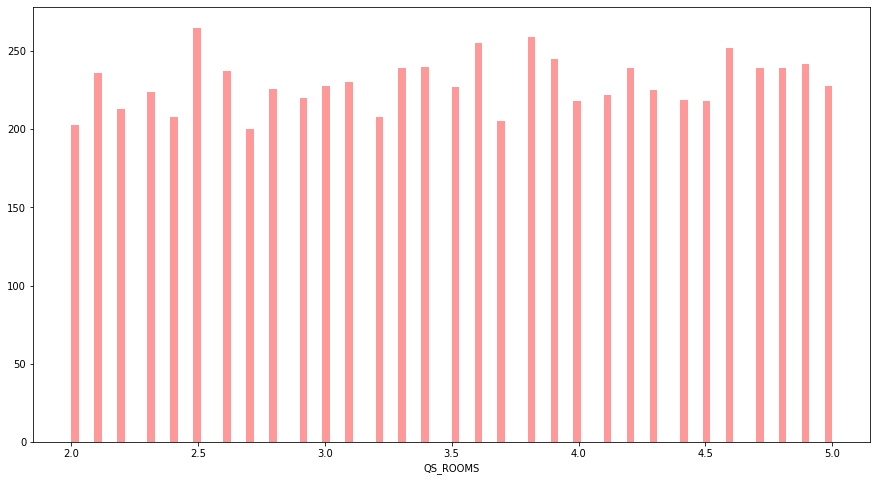

In [364]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(data['QS_ROOMS'],kde = False,color ='red', bins = 100,ax=ax)
plt.show()

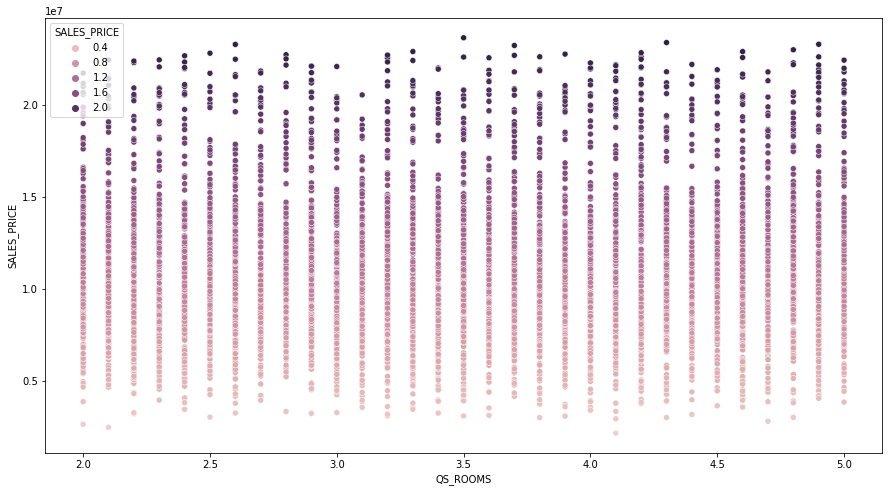

In [365]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x='QS_ROOMS', y='SALES_PRICE',data=data, hue = "SALES_PRICE",ax=ax)
plt.show()

1. There is no linear relationship between QS Room and Sales Price .

2. We couldn't observe any pattern between them.

3. So, we can delete the feature.



In [366]:
data = data.drop(columns = ['QS_ROOMS'])

### **QS_BATHROOM :**

In [367]:
data.QS_BATHROOM.values[0]

3.9

In [368]:
data.QS_BATHROOM = data.QS_BATHROOM.astype('float') 

In [369]:
data.QS_BATHROOM.describe()

count    7109.000000
mean        3.507244
std         0.897834
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BATHROOM, dtype: float64

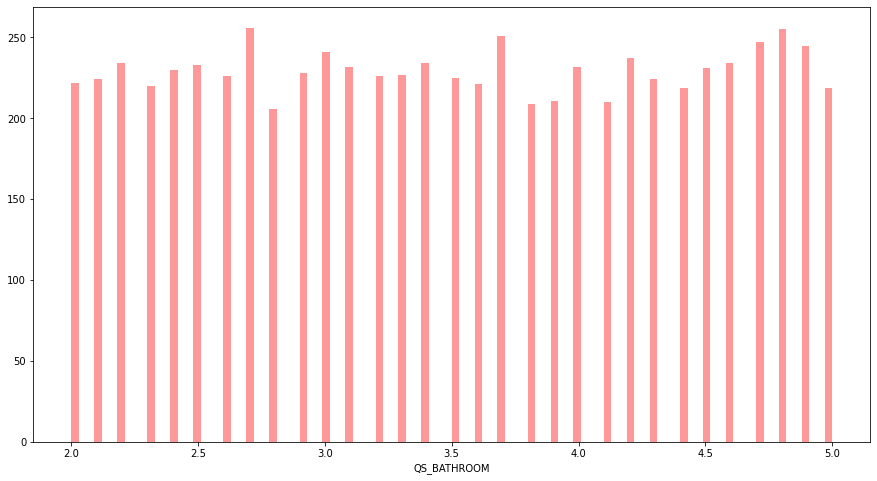

In [370]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(data['QS_BATHROOM'],kde = False,color ='red', bins = 100,ax=ax)
plt.show()

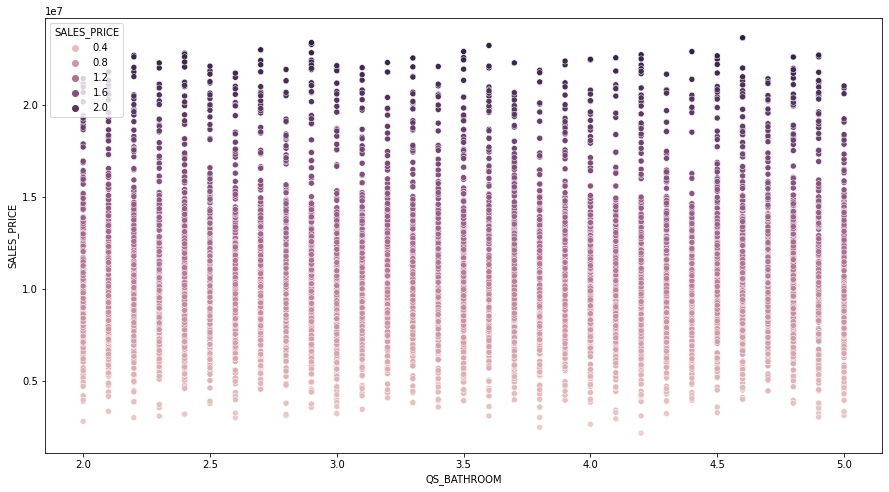

In [371]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x='QS_BATHROOM', y='SALES_PRICE',data=data, hue = "SALES_PRICE",ax=ax)
plt.show()

1. There is no linear relationship between QS Bathroom and Sales Price .

2. We couldn't observe any pattern between them.

3. So, we can delete the feature.



In [372]:
data = data.drop(columns = ['QS_BATHROOM'])

### **QS_BEDROOM :**

In [373]:
data.QS_BEDROOM.values[0]

4.9

In [374]:
data.QS_BEDROOM = data.QS_BEDROOM.astype('float') 

In [375]:
data.QS_BEDROOM.describe()

count    7109.000000
mean        3.485300
std         0.887266
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BEDROOM, dtype: float64

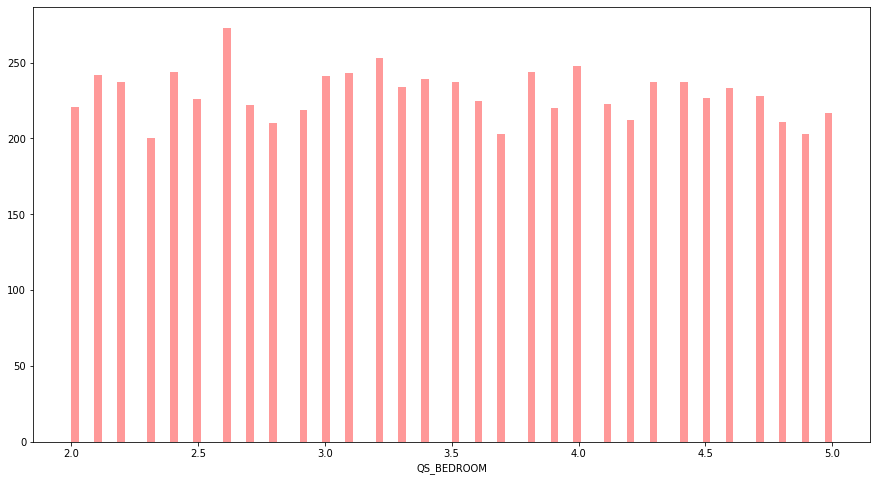

In [376]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(data['QS_BEDROOM'],kde = False,color ='red', bins = 100,ax=ax)
plt.show()

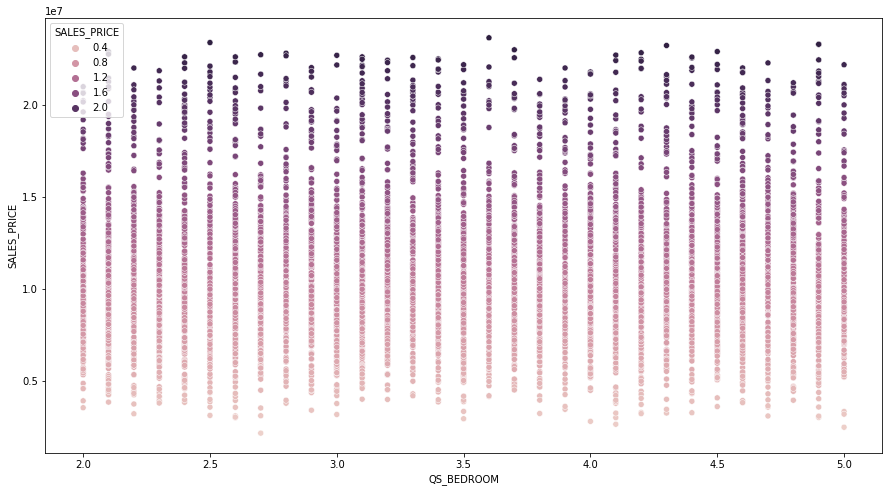

In [377]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x='QS_BEDROOM', y='SALES_PRICE',data=data, hue = "SALES_PRICE",ax=ax)
plt.show()

1. There is no linear relationship between QS Bedroom and Sales Price .

2. We couldn't observe any pattern between them.

3. So, we can delete the feature.



In [378]:
data = data.drop(columns = ['QS_BEDROOM'])

### **QS_OVERALL :**

In [379]:
data.QS_OVERALL.values[0]

4.33

In [380]:
data.QS_OVERALL = data.QS_OVERALL.astype('float') 

In [381]:
data.QS_OVERALL.fillna(data.QS_OVERALL.mean(),inplace=True)

In [382]:
data.QS_OVERALL.isnull().sum()

0

In [383]:
data.QS_OVERALL.describe()

count    7109.000000
mean        3.503254
std         0.525440
min         2.000000
25%         3.130000
50%         3.503254
75%         3.880000
max         4.970000
Name: QS_OVERALL, dtype: float64

In [384]:
data.QS_OVERALL.value_counts()

3.540    59
3.260    57
3.320    56
3.560    55
3.360    54
         ..
2.545     1
2.110     1
3.965     1
4.345     1
4.940     1
Name: QS_OVERALL, Length: 480, dtype: int64

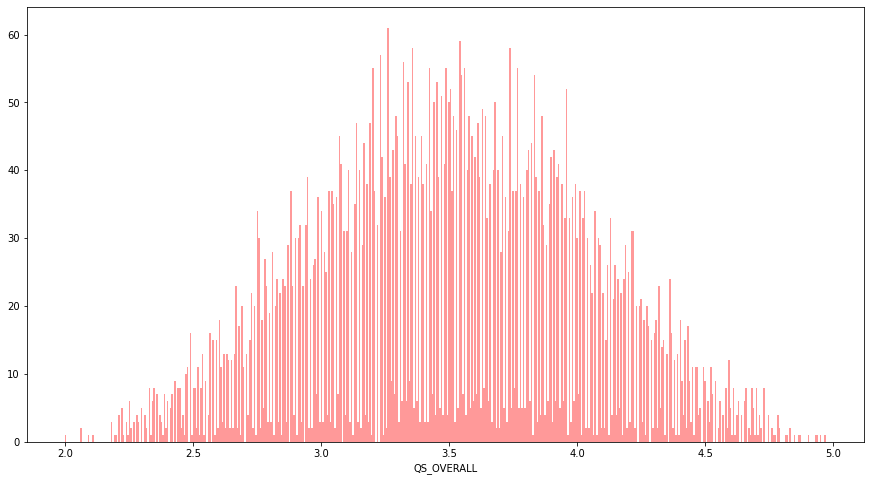

In [385]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(data['QS_OVERALL'],kde = False,color ='red', bins = 500,ax=ax)
plt.show()

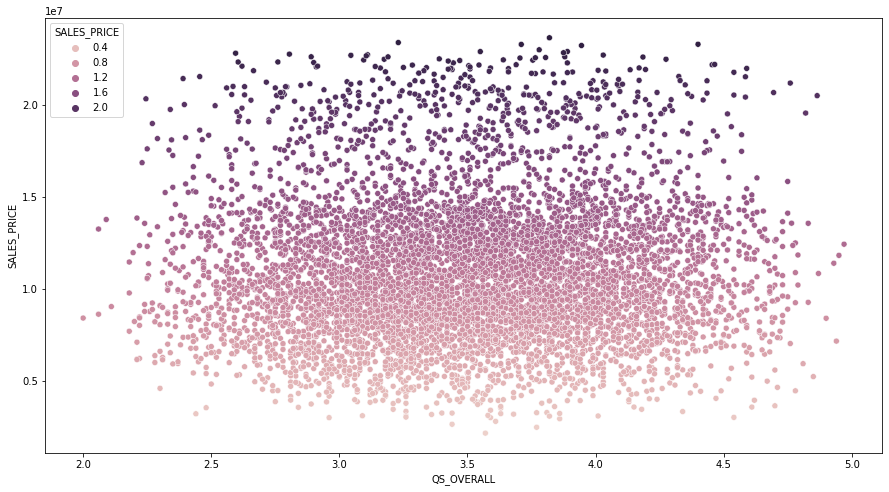

In [386]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x='QS_OVERALL', y='SALES_PRICE',data=data, hue = "SALES_PRICE",ax=ax)
plt.show()

1. There is no linear relationship between QS Overall and Sales Price .

2. We couldn't observe any pattern between them.

3. So, we can delete the feature.



In [387]:
data = data.drop(columns = ['QS_OVERALL'])

### **Registration Fees :**

In [388]:
data = data.drop(columns = ['REG_FEE'])

### **Commision :**

In [389]:
data = data.drop(columns = ['COMMIS'])

### **Target Variable ( SALES_PRICE ):**

0.7733433358864348


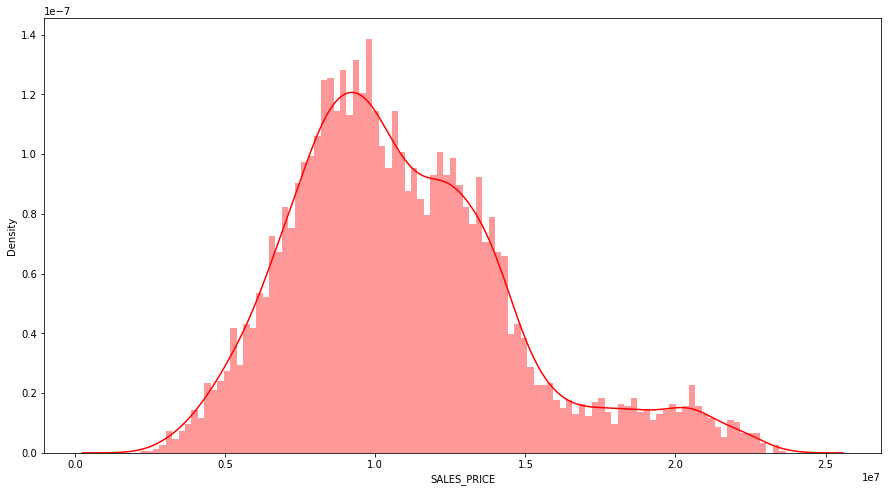

In [390]:
target_skew = data['SALES_PRICE'].skew()
print(target_skew)
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(data['SALES_PRICE'],kde = True,color ='red', bins = 100,ax=ax)
plt.show()

-0.27310178620365555


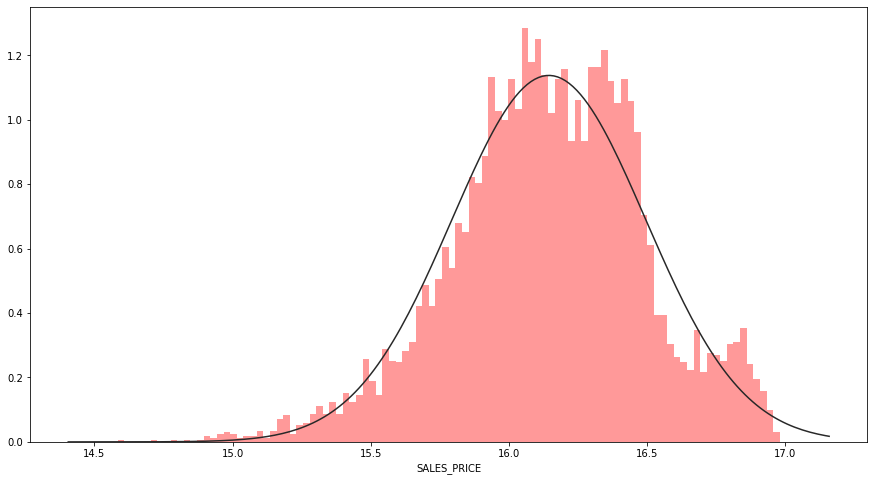

In [391]:
from scipy.stats import norm, skew
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(np.log1p(data['SALES_PRICE']), fit = norm,kde = False,color ='red', bins = 100,ax=ax)
print(np.log1p(data['SALES_PRICE']).skew())
plt.show()

-0.2731019222517942


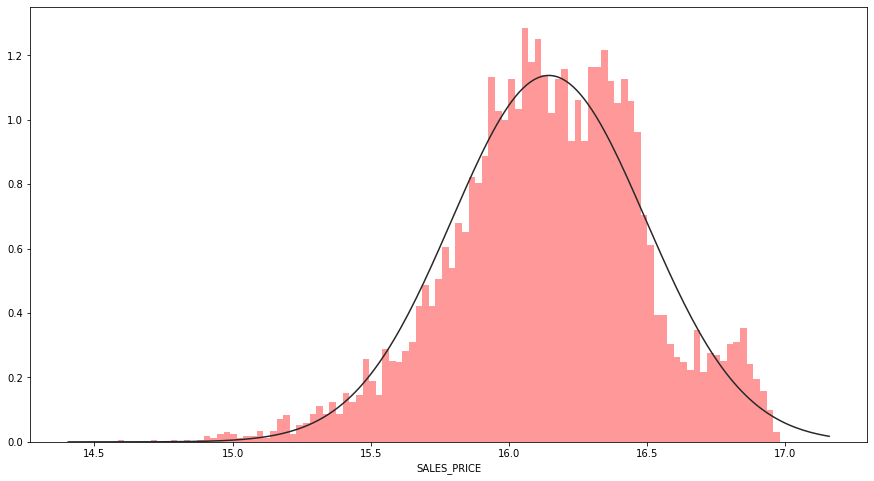

In [392]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(np.log(data['SALES_PRICE']), fit = norm, kde = False,color ='red', bins = 100,ax=ax)
print(np.log(data['SALES_PRICE']).skew())
plt.show()

-0.27304429433000926


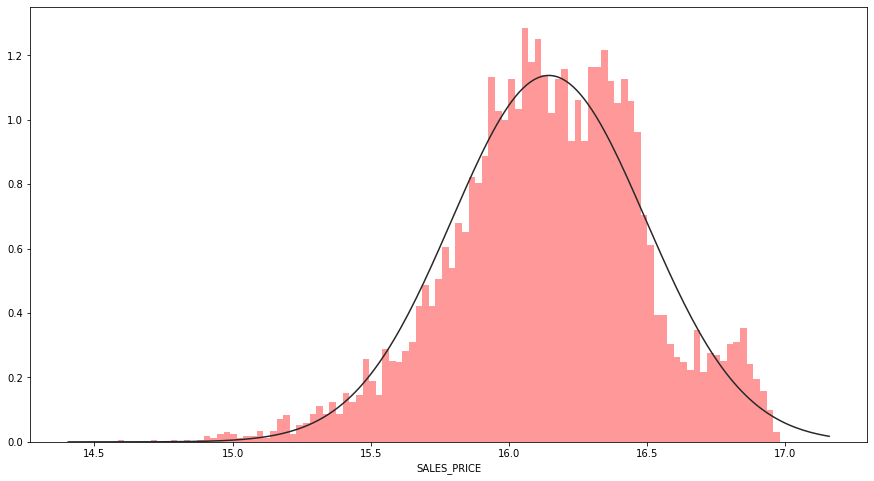

In [393]:
from scipy.stats import skew
from scipy.special import boxcox
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(boxcox(data['SALES_PRICE'], 0), fit = norm, kde = False,color ='red', bins = 100,ax=ax)
print(skew(boxcox(data['SALES_PRICE'], 0)))
plt.show()

In [394]:
data['SALES_PRICE'] = np.log1p(data['SALES_PRICE'])

In [395]:
data['SALES_PRICE'].skew()

-0.27310178620365555

* The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

## **Correlation :**

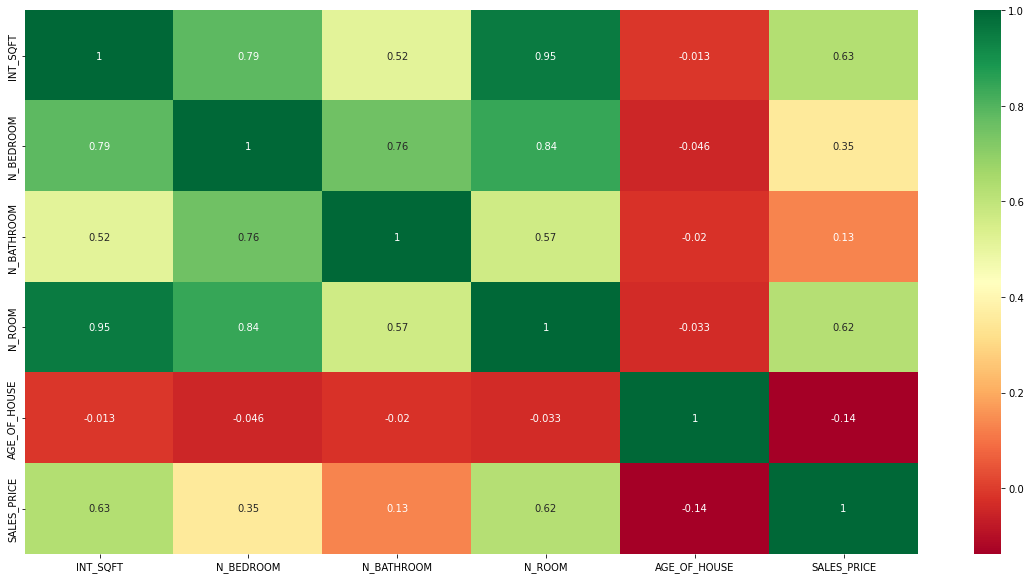

In [396]:
plt.figure(figsize=(20,10))
sns.heatmap(data[['INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','AGE_OF_HOUSE','SALES_PRICE']].corr(),cbar=True,annot=True,cmap="RdYlGn")
plt.show()

1. INT_SQFT and N_ROOMS are highly correlated with each other (0.95). So, we can't use both of them in determining the house price.

2. Also, high correlation between N_ROOMS and N_BEDROOM (0.84).

3. Since, 'N_ROOMS' is highly correlated with INT_SQFT and N_BEDROOM, we'll delete that feature in our prediction.

In [397]:
data = data.drop(columns = ['N_ROOM'])

# **Model Fitting :**

In [398]:
data.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE',
       'AGE_OF_HOUSE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others'],
      dtype='object')

In [399]:
data = data[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM',  'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
        'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others', 'AGE_OF_HOUSE', 'SALES_PRICE']]

data

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,AGE_OF_HOUSE,SALES_PRICE
0,1,1004,1.0,1.0,3,2,4,2,1,1,0,0,44,15.843659
1,6,1986,2.0,1.0,3,1,4,3,4,1,0,0,11,16.893641
2,2,909,1.0,1.0,3,2,1,3,5,1,0,0,20,16.392632
3,4,1855,3.0,2.0,2,1,3,2,3,0,0,1,22,16.080424
4,1,1226,1.0,1.0,3,2,4,3,2,0,0,1,30,15.817835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,1.0,1.0,5,1,1,1,6,0,0,1,49,15.493168
7105,4,1897,3.0,2.0,2,2,2,1,4,0,0,1,9,16.196766
7106,4,1614,2.0,1.0,4,1,2,3,3,0,1,0,28,15.937941
7107,1,787,1.0,1.0,1,2,1,2,5,1,0,0,32,15.956400


## **Train Test Data - Normalized :**

In [400]:
X = data.iloc[:, :-1].values # array of features
y = data.loc[:, 'SALES_PRICE'].values # array of targets

## **Spliting the Data :**

In [401]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## **Scaling the Data :**

In [402]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train,y_train) # It will find the Mean and Standard Deviation value in the Train data
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

## **Linear Regression :**

In [403]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [404]:
y_pred = regressor.predict(X_test)

In [405]:
print(regressor.intercept_) # c 

16.144178895782584


In [406]:
print(regressor.coef_)

[ 1.12426372e-01  1.65184770e-01 -7.10595910e-02  2.33234368e-02
  1.97083889e-02  5.03636515e-02  3.33195889e-03  3.81161320e-02
  1.05092531e-01 -4.28649192e+12 -4.34575743e+12 -4.26195992e+12
 -2.49970887e-02]


### **Metrics (Evaluation) :**

In [407]:
from sklearn import metrics
print('R2- Score for Linear Regression:', metrics.r2_score(y_test,y_pred).round(2))

R2- Score for Linear Regression: 0.92


## **KNN Algorithm :**

In [408]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i) 
  knn.fit(X_train, y_train) 
  print("K value  : " , i," Train Accuracy : ", knn.score(X_train, y_train), " Val Accuracy : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10))) 

K value  :  1  Train Accuracy :  1.0  Val Accuracy :  0.860604817691652
K value  :  2  Train Accuracy :  0.9663301114632492  Val Accuracy :  0.8994036986581383
K value  :  3  Train Accuracy :  0.9565388716807385  Val Accuracy :  0.9066214758212888
K value  :  4  Train Accuracy :  0.9496582834151324  Val Accuracy :  0.9073934212061303
K value  :  5  Train Accuracy :  0.9437451159187664  Val Accuracy :  0.9096765559624227
K value  :  6  Train Accuracy :  0.939528156737747  Val Accuracy :  0.9102097442153181
K value  :  7  Train Accuracy :  0.9365098405653111  Val Accuracy :  0.9107201459505848
K value  :  8  Train Accuracy :  0.9336797497257118  Val Accuracy :  0.9096261714638916
K value  :  9  Train Accuracy :  0.9310284656279516  Val Accuracy :  0.9073444056571741
K value  :  10  Train Accuracy :  0.9278943708899944  Val Accuracy :  0.906030408496919
K value  :  20  Train Accuracy :  0.9091003953406575  Val Accuracy :  0.8953883127502884
K value  :  50  Train Accuracy :  0.883047884679

In [409]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 6)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

### **Metrics (Evaluation) :**

In [410]:
from sklearn import metrics
print("R2 Score for KNN Algorithm : ", metrics.r2_score(y_test, Y_pred).round(2)) #predicting using the model

R2 Score for KNN Algorithm :  0.91


## **Decision Tree Regressor :**

In [411]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTree
DecisionTree = DecisionTreeRegressor()

# Fit DecisionTree to the training set
DecisionTree.fit(X_train, y_train)

# Predict test set labels
y_pred = DecisionTree.predict(X_test)

### **Metrics (Evaluation) :**

In [412]:
from sklearn.metrics import r2_score

# Compute y_pred
y_pred = DecisionTree.predict(X_test)

print("R2 Score of DecisionTree: ", r2_score(y_test,y_pred).round(2))

R2 Score of DecisionTree:  0.96


In [413]:
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeRegressor(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = r2_score(y_test,y_pred) # this is useless information - i am showing to prove a point
  dt = DecisionTreeRegressor(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9602190355277147  Cross val score :  0.3268833372292096
Depth  :  2  Training Accuracy :  0.9602190355277147  Cross val score :  0.5892717275857133
Depth  :  3  Training Accuracy :  0.9602190355277147  Cross val score :  0.7439686837016428
Depth  :  4  Training Accuracy :  0.9602190355277147  Cross val score :  0.8308200775223605
Depth  :  5  Training Accuracy :  0.9602190355277147  Cross val score :  0.879897140533177
Depth  :  6  Training Accuracy :  0.9602190355277147  Cross val score :  0.9100875907434902
Depth  :  7  Training Accuracy :  0.9602190355277147  Cross val score :  0.9284164787210043
Depth  :  8  Training Accuracy :  0.9602190355277147  Cross val score :  0.9401560819280194
Depth  :  9  Training Accuracy :  0.9602190355277147  Cross val score :  0.9474103811246888
Depth  :  10  Training Accuracy :  0.9602190355277147  Cross val score :  0.950382017149552
Depth  :  20  Training Accuracy :  0.9602190355277147  Cross val score :  0.95396

In [414]:
data.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others',
       'AGE_OF_HOUSE', 'SALES_PRICE'],
      dtype='object')

In [415]:
dt.fit(X_train, y_train)
fimp = dt.feature_importances_.round(3)
List = fimp.tolist()
Fea = data.columns[:-1].tolist()

val = {
    'Feature' : Fea,
    'Importances' : List
}

Feature = pd.DataFrame(val).sort_values(by='Importances', ascending = False)
Feature

,Feature,Importances
0,AREA,0.485
9,BUILDTYPE_Commercial,0.259
1,INT_SQFT,0.131
8,MZZONE,0.069
5,PARK_FACIL,0.021
7,STREET,0.015
12,AGE_OF_HOUSE,0.008
4,SALE_COND,0.004
6,UTILITY_AVAIL,0.003
10,BUILDTYPE_House,0.003


## **Random Forest Regressor :**

In [417]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 100, max_depth = 18, max_features='sqrt')

# Train the model on training data
rf.fit(X_train, y_train);

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)

### **Metrics (Evaluation) :**

In [418]:
from sklearn.metrics import r2_score
print('R2 - Score for Random Forest Regressor:', r2_score(y_pred, y_test).round(2))

R2 - Score for Random Forest Regressor: 0.98


## **XG Boost :**

In [419]:
import warnings
warnings.filterwarnings('ignore')

In [420]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) # train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -267.3733470390296  Cross-Val score :  -268.9371095852584
Learning rate :  0.02  Train score :  -34.44930332214325  Cross-Val score :  -34.674854214372104
Learning rate :  0.03  Train score :  -3.651465840583948  Cross-Val score :  -3.6872596055640785
Learning rate :  0.04  Train score :  0.36130786822816063  Cross-Val score :  0.35254508296608406
Learning rate :  0.05  Train score :  0.8846986502092302  Cross-Val score :  0.8795636833253779
Learning rate :  0.06  Train score :  0.9594983947592509  Cross-Val score :  0.9543031438536673
Learning rate :  0.07  Train score :  0.9748469814538535  Cross-Val score :  0.9703101957401378
Learning rate :  0.08  Train score :  0.9800637847619599  Cross-Val score :  0.9768915407657964
Learning rate :  0.09  Train score :  0.9849675561824471  Cross-Val score :  0.9813818824492078
Learning rate :  0.1  Train score :  0.9873987496399846  Cross-Val score :  0.9843655146971637
Learning rate :  0.11  Train score : 

### **Metrics (Evaluation) :**

In [422]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
model.fit(X_train,y_train) # train the model
print("R2 Score for XG Boost Algorithm : ",model.score(X_test, y_test).round(2)) # scoring the model - r2 squared

[05:30:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score for XG Boost Algorithm :  0.99
